In [26]:

import pandas as pd
import numpy as np
df_train=pd.read_csv('../data/df_Training.csv')
df_test=pd.read_csv('../data/df_Test.csv')

In [27]:
df_train.head()

,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,TLCnt03,...,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct,TARGET
0,478,0,0,0,1,4.0,1,487,12,0,...,0.7681,0.8182,0,0,0,0.5909,0,0,0.4615,0
1,87963,0,0,0,4,1.0,3,283,6,0,...,0.7108,0.7273,0,0,1,0.5909,0,0,0.1538,0
2,35365,2,1,0,2,2.0,5,252,11,0,...,0.4656,0.0526,3,7,14,0.5263,9,9,0.1000,1
3,8250,0,0,0,1,3.0,6,165,27,0,...,0.8179,0.0714,2,9,11,0.5714,9,10,0.0000,1
4,86359,0,0,0,3,1.0,3,331,6,0,...,0.6032,0.6500,3,2,3,0.7500,2,3,0.4000,0


In [28]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 30 columns):
ID                 1800 non-null int64
DerogCnt           1800 non-null int64
CollectCnt         1800 non-null int64
BanruptcyInd       1800 non-null int64
InqCnt06           1800 non-null int64
InqTimeLast        1683 non-null float64
InqFinanceCnt24    1800 non-null int64
TLTimeFirst        1800 non-null int64
TLTimeLast         1800 non-null int64
TLCnt03            1800 non-null int64
TLCnt12            1800 non-null int64
TLCnt24            1800 non-null int64
TLCnt              1797 non-null float64
TLSum              1774 non-null float64
TLMaxSum           1774 non-null float64
TLSatCnt           1799 non-null float64
TLDel60Cnt         1800 non-null int64
TLBadCnt24         1800 non-null int64
TL75UtilCnt        1735 non-null float64
TL50UtilCnt        1735 non-null float64
TLBalHCPct         1773 non-null float64
TLSatPct           1799 non-null float64
TLDel3060Cnt24   

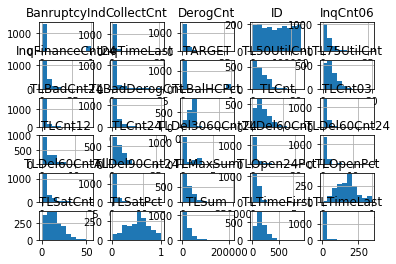

In [32]:
plt.figure(figsize=[10,10])
df_train.hist()
plt.show()

In [25]:
from sklearn.metrics import (precision_recall_curve, auc,roc_auc_score, roc_curve,recall_score, classification_report)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import xgboost
from xgboost import XGBClassifier
def get_result(df_select):
    

    Y=df_select.TARGET
    X=df_select.drop(columns='TARGET',axis=0)


    lisan_feature=[i  for i in X.columns if len(X[i].unique()) <= 8]
    lianxu_feature=[i  for i in X.columns if len(X[i].unique()) > 8]
    for i in lisan_feature:
        X[i]=X[i].astype(str)
    X1=pd.get_dummies(X)

    X_train,X_test,y_train,y_test=train_test_split(X1,Y,test_size=0.2,random_state=1)
    model = XGBClassifier(n_estimators=100,max_depth=8)
    model.fit(X_train, y_train)
    y_test_pr=model.predict(X_test)

    Accuracy=accuracy_score(y_test,y_test_pr)
    auc=roc_auc_score(y_test,y_test_pr)
    feature_num=len(model.feature_importances_[model.feature_importances_>0])
    num=X.shape[0]
    feature_sum_num=X.shape[1]

    return [Accuracy,auc,feature_num,feature_sum_num,num]

get_result(df_train)

[0.8027777777777778, 0.5561224489795918, 32, 28, 1800]

In [7]:
df_train=df_train.fillna(df_train.mean())

In [8]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,auc

Y=df_train.TARGET
X=df_train.drop(columns=['TARGET','ID'])
minsc=MinMaxScaler()
X=minsc.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)





In [9]:
logis_model=LogisticRegression(penalty='l2',solver='liblinear')
svc_model=SVC(C=1.5,gamma=0.25)
rnd_model = RandomForestClassifier(n_estimators=15, max_leaf_nodes=9, n_jobs=1)
model_dict={"logis_model":logis_model,"svc_model":svc_model,"rnd_model":rnd_model}
for key in model_dict:
    model_dict[key].fit(X_train,y_train)
    train_score=model_dict[key].score(X_train,y_train)
    test_score=model_dict[key].score(X_test,y_test)
    y_predict_rf=model_dict[key].predict(X_test)
    acc=accuracy_score(y_test, y_predict_rf)
    fpr,tpr,thresholds=roc_curve(y_test,y_predict_rf)
    print('模型：{},train_score : {}, test_score : {},acc : {}'.format(key,train_score,test_score,acc))


模型：logis_model,train_score : 0.8472222222222222, test_score : 0.8166666666666667,acc : 0.8166666666666667
模型：svc_model,train_score : 0.8375, test_score : 0.8166666666666667,acc : 0.8166666666666667
模型：rnd_model,train_score : 0.84375, test_score : 0.8166666666666667,acc : 0.8166666666666667


In [13]:
import matplotlib.pyplot as plt
#交叉表的实现，一般查看类别变量去交叉。
cors1=pd.crosstab(df_train['DerogCnt'],df_train['CollectCnt'])
from statsmodels.graphics.mosaicplot import mosaic
plt.figure(figsize=[15,20])
mosaic(cors1.stack())
plt.show()

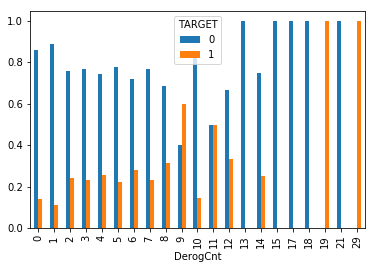

In [14]:
cores2=pd.crosstab(df_train['DerogCnt'],df_train['TARGET'])
#各个区间好坏之间的占比情况  cores2.div(cores2.sum(1).astype(float),axis=0)使各行数据和为一
div2=cores2.div(cores2.sum(1).astype(float),axis=0)
div2.plot(kind='bar')
plt.show()

In [16]:
df_train=df_train.drop(columns='ID',axis=0)

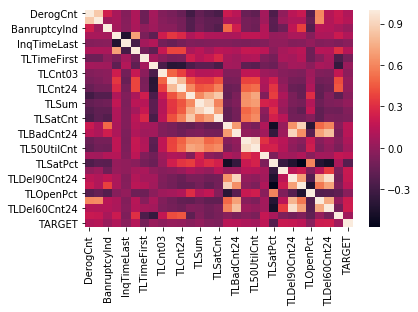

In [17]:
cor=df_train.corr()
import seaborn as sns
sns.heatmap(cor)

In [18]:
#统计缺失值
loss_col=[i  for i in df_train.columns if sum(pd.notna(df_train[i]))<len(df_train)]
df_train=df_train.fillna(df_train.mean())
Y=df_train['TARGET']
X=df_train.drop(columns='TARGET')




In [19]:
from sklearn.model_selection import learning_curve
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from  sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler
X=MinMaxScaler().fit_transform(X)


X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

def pipepline_model(degree=1,**kwarg):
    poly_model=PolynomialFeatures(degree=degree,include_bias=False)
    log_model=LogisticRegression(**kwarg)
    pipe_model=Pipeline([("poly_model",poly_model),("log_model",log_model)])
    return pipe_model



In [20]:
model=pipepline_model(degree=2,penalty='l1')
model.fit(X_train,y_train)
train_score=model.score(X_train,y_train)
test_score=model.score(X_test,y_test)
train_score,test_score

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(0.8520833333333333, 0.8138888888888889)

[0.8027777777777778, 0.5561224489795918, 32, 28, 1800]

(1800, 29)

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

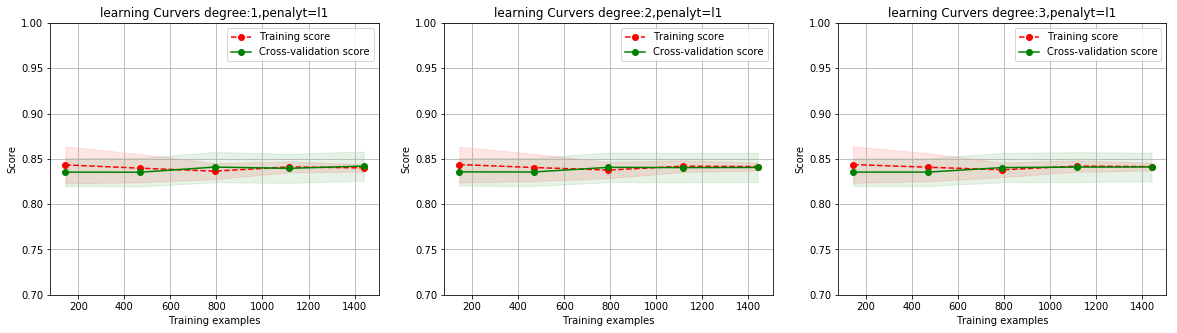

In [13]:
# 学习曲线

from sklearn.model_selection import ShuffleSplit
from utils import plot_learning_curve
cv=ShuffleSplit(n_splits=20,test_size=0.2,random_state=0)
title='learning Curvers degree:{},penalyt={}'
degrees=[1,2,3]
penalty='l1'
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    
    plot_learning_curve(plt,pipepline_model(degree=degrees[i],penalty=penalty),title.format(degrees[i],penalty),
                        
                       X=X,y=Y,ylim=(0.7,1),cv=cv)
    



D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\developers\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

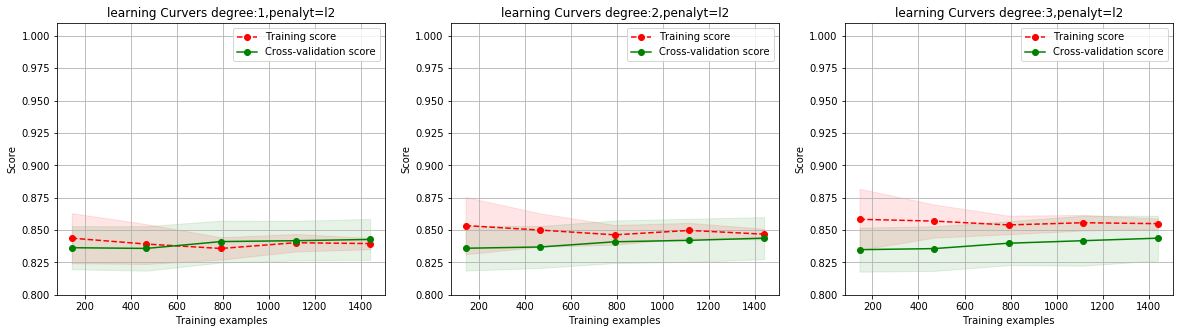

In [14]:
cv=ShuffleSplit(n_splits=20,test_size=0.2,random_state=0)
title='learning Curvers degree:{},penalyt={}'
degrees=[1,2,3]
penalty='l2'
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
for i in range(len(degrees)):
    plt.subplot(1,len(degrees),i+1)
    
    plot_learning_curve(plt,pipepline_model(degree=degrees[i],penalty=penalty),title.format(degrees[i],penalty),
                        
                       X=X,y=Y,ylim=(0.8,1.01),cv=cv)

In [15]:
df_test1=df_test.drop(columns=['ID','TARGET'],axis=0)

In [16]:
df_test1=df_test1.fillna(df_test.mean())


In [17]:
result=model.predict(MinMaxScaler().fit_transform(df_test1))

In [18]:
dd=pd.DataFrame({'ID':df_test['ID'],'Predicted_Results':result})

In [19]:
dd.to_csv('../data/results.csv',index=False)

In [20]:
from sklearn import svm
clf=svm.SVC(C=1.0,kernel='rbf',gamma=0.1)
clf.fit(X_train,y_train)
train_score=clf.score(X_train,y_train)
test_score=clf.score(X_test,y_test)
train_score,test_score

(0.8375, 0.8166666666666667)

In [21]:
def plot_param_curve(plt, train_sizes, cv_results, xlabel):
    train_scores_mean = cv_results['mean_train_score']
    train_scores_std = cv_results['std_train_score']
    test_scores_mean = cv_results['mean_test_score']
    test_scores_std = cv_results['std_test_score']
    plt.title('parameters turning')
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel('score')
    plt.fill_between(train_sizes, 
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, 
                     alpha=0.1, color="r")
    plt.fill_between(train_sizes, 
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, 
                     alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, '.--', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, '.-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [23]:
# 卡方检验选择特征

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model1=SelectKBest(chi2,k=2)
model1.fit_transform(X,Y)
model1.scores_
model1.pvalues_

array([8.38941567e-02, 2.46747601e-02, 3.82014053e-01, 8.43861201e-02,
       5.19510894e-01, 5.80888003e-02, 3.01821840e-01, 7.55480233e-01,
       7.61441513e-01, 8.67692700e-01, 9.96807385e-01, 6.49121463e-01,
       9.98035739e-01, 4.49686888e-01, 2.94888505e-01, 3.98841684e-03,
       1.18092427e-02, 1.80022620e-01, 4.14893548e-01, 2.14916351e-01,
       1.87815213e-03, 5.35429882e-05, 3.68632122e-04, 4.48905784e-03,
       6.83384723e-01, 5.83615589e-05, 3.23967474e-05, 6.26196835e-01])

In [51]:

from sklearn.datasets import load_iris


iris = load_iris()

iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [55]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
model1 = SelectKBest(chi2, k=2)#选择k个最佳特征
model1.fit_transform(X,Y)#特征X，标签Y
model1.scores_   #评分越高， 特征越好， 
model1.pvalues_  # 值越小，越显著

array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ])

In [78]:
import scipy.stats as scs


def doDivide(data,interval,feature):
    category=[]
    pValue,chi2,index=divdeData(data,interval[0],interval[1],feature)
    if chi2<15:
        category.append(interval)
    else:
        category+=doDivide(data,[interval[0],index])
        category+=doDivide(data,[index,interval[1]])
    return category

def divdeData(data,minValue,maxValue,feature):
    """
    遍历所有可能的分段。返回卡方统计来给你最高的分段
    """
    maxChi2=0
    index=-1
    maxPValue=0
    for i in range(minValue+1,maxValue):
        category=pd.cut(data[feature],[minValue,i,maxValue],include_lowest=True)
        corss=pd.crosstab(data['TARGET'],category)
        chi2,pValue,_,_=scs.chi2_contingency(corss)
        if chi2>maxChi2:
           maxPValue=pValue
           maxChi2=chi2
           index=i
    return maxPValue,maxChi2,index


In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
col1=["InqTimeLast","TLTimeFirst","TLTimeLast","TLBalHCPct","TLSatPct","TLDel60CntAll","TLOpenPct","TLOpen24Pct"]
dd=df_train[col1]

In [91]:
vif=pd.DataFrame()
#方差膨胀因子，通常当方差膨胀因子大于5时，就认定对应变量有明显的共线性问题
vif['fact']=[variance_inflation_factor(dd.values,i) for i in range(dd.shape[1])]

In [92]:
vif['fx']=dd.columns

In [93]:
vif

,fact,fx
0,1.496282,InqTimeLast
1,3.747898,TLTimeFirst
2,1.568371,TLTimeLast
3,6.167260,TLBalHCPct
4,10.663939,TLSatPct
5,1.961760,TLDel60CntAll
6,9.973306,TLOpenPct
7,2.797604,TLOpen24Pct
